In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
# import ase
# import ase.io as aseio
# import nglview

In [2]:
fes=np.genfromtxt("1600.dat")

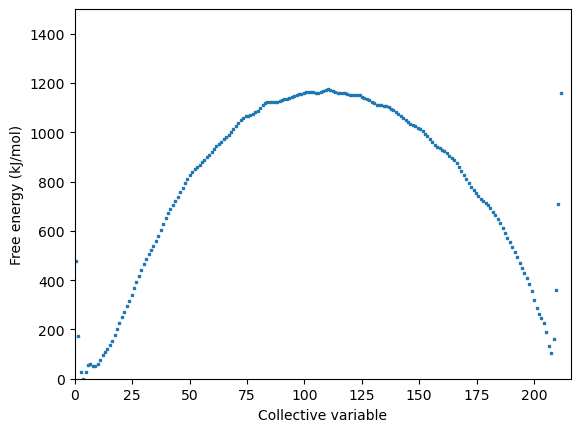

In [120]:
plt.plot(fes[:,0],fes[:,1]-np.amin(fes[:,1]),  ms=1.5, linestyle='None', marker='s')
plt.xlabel("Collective variable")
plt.ylabel("Free energy (kJ/mol)")
plt.xlim([0,216])
plt.ylim([0,1500])
plt.show()

We can approximate the difference in free energy between the liquid and the solid as a the difference in height between the two minima. Let's calculate that.

In [ ]:
fes=np.genfromtxt("1670.dat")
N = fes.shape[0]
x = fes[:,0]
y_solid = fes[:,1][int(N/2):]
y_liquid = fes[:,1][:int(N/2)]
N=fes.shape[0]
freeEnergyLiquid=np.amin(y_liquid)
freeEnergySolid=np.amin(y_solid)
deltaFreeEnergy=freeEnergySolid-freeEnergyLiquid
print("The difference in free energy between the solid and the liquid is: " + "{:.{}f}".format(deltaFreeEnergy,2) + " kJ/mol or " + "{:.{}f}".format(deltaFreeEnergy/14.134,2) + " kT.")
print("Therefore at this temperature the solid is more stable than the liquid.")

The difference in free energy between the solid and the liquid is: -160.24 kJ/mol or -11.34 kT.
Therefore at this temperature the solid is more stable than the liquid.


20306.51579483348
8175.063276704357
-5066.811576556545
-13394.378152768826
-29623.862085714412


/var/folders/87/z37n4g2j595fd7ly45xb9y680000gn/T/ipykernel_2942/3025065024.py:29: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  intsolid = np.trapz(y_solid, x[int(N/2):])
/var/folders/87/z37n4g2j595fd7ly45xb9y680000gn/T/ipykernel_2942/3025065024.py:30: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  intliquid = np.trapz(y_liquid, x[:int(N/2)])
/var/folders/87/z37n4g2j595fd7ly45xb9y680000gn/T/ipykernel_2942/3025065024.py:32: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  int_single.append(np.trapz(y, x))


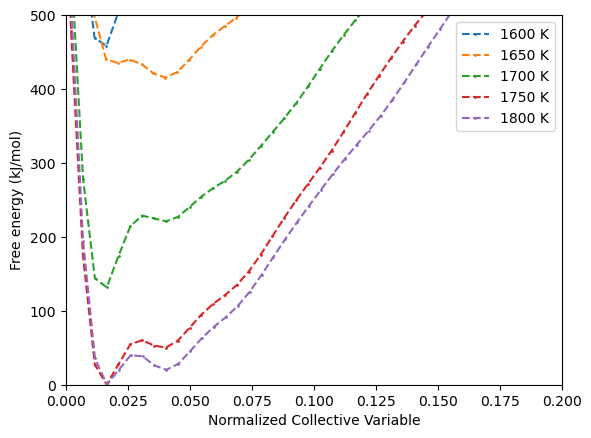

In [204]:
deltaf = []
ints = []
int_single = []


min_solid = []  
min_liquid = []


temps = [1600, 1650, 1700, 1750, 1800]
for T in temps:
    fes=np.genfromtxt(str(T)+".dat")
    N = fes.shape[0]
    x = fes[:,0]
    y = np.array(fes[:,1])
    # plt.plot(x, np.exp(-y/(T*8.3145)), label=str(T) + " K")
    plt.plot(x/np.max(x),y, label=str(T) + " K", linestyle='dashed', marker='o', markersize=1)
    y_solid = np.array(fes[:,1][int(N/2):])
    y_liquid = np.array(fes[:,1][:int(N/2)])
    freeEnergyLiquid=np.amin(y_liquid)

    min_liquid.append(np.amin(y_liquid))
    min_solid.append(np.amin(y_solid))

    freeEnergySolid=np.amin(y_solid)
    deltaFreeEnergy=freeEnergySolid-freeEnergyLiquid
    deltaf.append(deltaFreeEnergy)

    intsolid = np.trapz(y_solid, x[int(N/2):])
    intliquid = np.trapz(y_liquid, x[:int(N/2)])

    int_single.append(np.trapz(y, x))

    print(intliquid-intsolid)
    ints.append(intliquid-intsolid)


plt.legend()
plt.xlabel("Normalized Collective Variable")
plt.ylabel("Free energy (kJ/mol)")

plt.ylim(0,500)
plt.xlim(0,0.2)

# plt.savefig("free_energ_temp.png", dpi=300)
plt.savefig("free_energ_temp_closeup.png", dpi=300)



The melting point is: 1726.18 K
rval
0.982847457079423


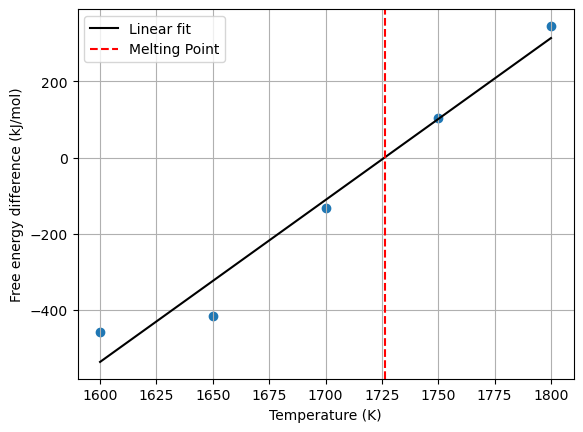

In [171]:
plt.scatter(temps, deltaf)
slope, intercept, r_value, p_value, std_err = linregress(temps, deltaf)
tempcont = np.linspace(1600, 1800, 100)
plt.plot(tempcont, slope*tempcont + intercept, label="Linear fit", color='k')
plt.axvline(-intercept/slope, color='r', linestyle='--', label="Melting Point")
plt.xlabel("Temperature (K)")
plt.ylabel("Free energy difference (kJ/mol)")
plt.grid()
plt.legend()


print("The melting point is: " + "{:.{}f}".format(-intercept/slope,2) + " K")   

print('rval')
print(r_value)

plt.savefig("meting_point_box3.png", dpi=300)

20306.51579483348
8175.063276704357
-6336.0758216657705
-5066.811576556545
-20494.469345149584
-11559.351503696453
-10081.189254647485
-13394.378152768826
-29623.862085714412
Heat (solid) (eV/particle):
0.38833134067769876
Heat (liquid) (eV/particle):
-0.34973085616950245
Heat (latent) (eV/particle):
0.7402077264891989


/var/folders/87/z37n4g2j595fd7ly45xb9y680000gn/T/ipykernel_2942/2422292676.py:27: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  intsolid = np.trapz(y_solid, x[int(N/2):])
/var/folders/87/z37n4g2j595fd7ly45xb9y680000gn/T/ipykernel_2942/2422292676.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  intliquid = np.trapz(y_liquid, x[:int(N/2)])
/var/folders/87/z37n4g2j595fd7ly45xb9y680000gn/T/ipykernel_2942/2422292676.py:30: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  int_single.append(np.trapz(y, x))


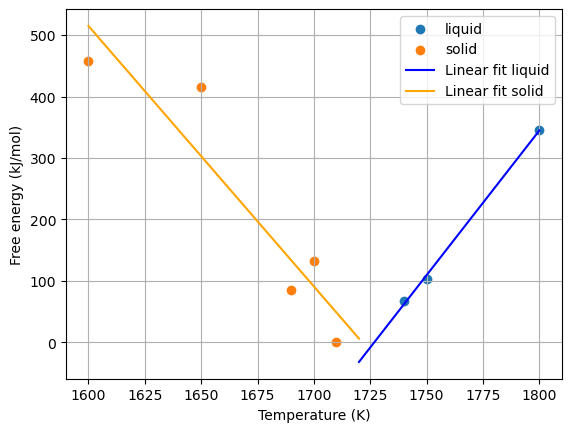

In [197]:
deltaf = []
ints = []
int_single = []


min_solid = []  
min_liquid = []


temps = [1600, 1650, 1690, 1700, 1710, 1730, 1740, 1750, 1800]
for T in temps:
    fes=np.genfromtxt(str(T)+".dat")
    N = fes.shape[0]
    x = fes[:,0]
    y = np.array(fes[:,1])
    y_solid = np.array(fes[:,1][int(N/2):])
    y_liquid = np.array(fes[:,1][:int(N/2)])
    freeEnergyLiquid=np.amin(y_liquid)

    min_liquid.append(np.amin(y_liquid))
    min_solid.append(np.amin(y_solid))

    freeEnergySolid=np.amin(y_solid)
    deltaFreeEnergy=freeEnergySolid-freeEnergyLiquid
    deltaf.append(deltaFreeEnergy)

    intsolid = np.trapz(y_solid, x[int(N/2):])
    intliquid = np.trapz(y_liquid, x[:int(N/2)])

    int_single.append(np.trapz(y, x))

    print(intliquid-intsolid)
    ints.append(intliquid-intsolid)



plt.scatter(temps[-3:], min_solid[-3:], label="liquid")
plt.scatter(temps[:-4], min_liquid[:-4], label="solid")


slope, intercept, r_value, p_value, std_err = linregress(temps[-3:], min_solid[-3:])
tempcont = np.linspace(1720, 1800, 100)
plt.plot(tempcont, slope*tempcont + intercept, label="Linear fit liquid", color='blue')

entropy_solid = slope

print('Heat (solid) (eV/particle):')
T=1720
NA = 6.022e+23
NPARTICLES = 216
print(slope*1000*T*6.242e+18/NA/NPARTICLES)


slope, intercept, r_value, p_value, std_err = linregress(temps[:-4], min_liquid[:-4])
tempcont = np.linspace(1600, 1720, 100)

plt.plot(tempcont, slope*tempcont + intercept, label="Linear fit solid", color='orange')

entropy_liquid = slope


print('Heat (liquid) (eV/particle):')
T=1720
NA = 6.022e+23
NPARTICLES = 216
print(slope*1000*T*6.242e+18/NA/NPARTICLES)



print('Heat (latent) (eV/particle):')
T=1725
NA = 6.022e+23
NPARTICLES = 216
print((entropy_solid-entropy_liquid)*1000*T*6.242e+18/NA/NPARTICLES)



plt.xlabel("Temperature (K)")
plt.ylabel("Free energy (kJ/mol)")
plt.legend()
plt.grid()

In [220]:
# data=np.genfromtxt("1670.lammps")
data=np.genfromtxt("1715.lammps")

time = data[:,0]
temp = data[:,1]
pot_energy = data[:,2]
pressure = data[:,3]
lx = data[:,4]

Average for data points > 20: 35.11220569020501
Average for data points < 19: nan
nan


/var/folders/87/z37n4g2j595fd7ly45xb9y680000gn/T/ipykernel_2942/3813448261.py:9: RuntimeWarning: Mean of empty slice.
  avg_less = specific_volume[specific_volume < 18.8].mean()


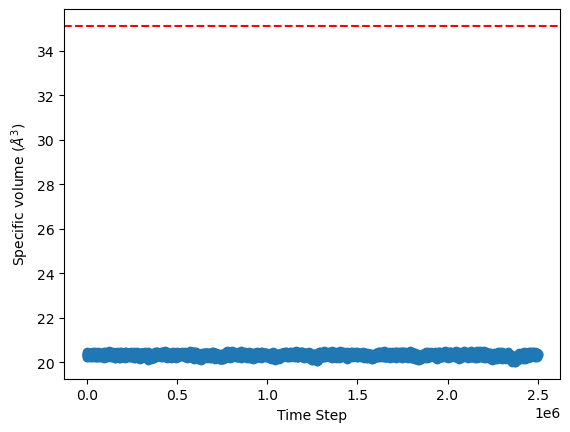

In [226]:
plt.scatter(time, lx**3/1728, label='Specific volume')
plt.xlabel("Time Step")
plt.ylabel(r"Specific volume ($\AA^3$)")


specific_volume = lx**3/1000

avg_greater = specific_volume[specific_volume > 20.5].mean()
avg_less = specific_volume[specific_volume < 18.8].mean()

print(f"Average for data points > 20: {avg_greater}")
print(f"Average for data points < 19: {avg_less}")

plt.axhline(y=avg_greater, color='r', linestyle='--')
plt.axhline(y=avg_less, color='g', linestyle='--')

print((avg_greater-avg_less)/avg_greater*100)

Average for data points > 20: 136.1095419947312
Average for data points < 19: 133.7625175759225
1.7243643497819972


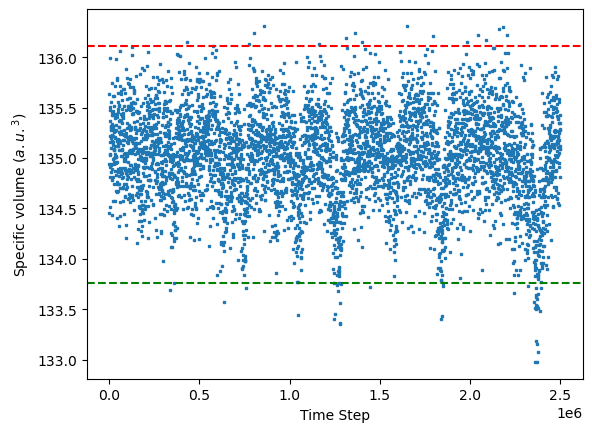

In [229]:
plt.plot(time, (lx*1.88)**3/1728, label='Specific volume', ms=1.5, linestyle='None', marker='s')

specific_volume = (lx*1.88)**3/1728

avg_greater = specific_volume[specific_volume > 136].mean()
avg_less = specific_volume[specific_volume < 134].mean()

plt.axhline(y=avg_greater, color='r', linestyle='--')
plt.axhline(y=avg_less, color='g', linestyle='--')

print(f"Average for data points > 20: {avg_greater}")
print(f"Average for data points < 19: {avg_less}")

plt.xlabel("Time Step")
plt.ylabel(r"Specific volume ($a.u.^3$)")


print((avg_greater-avg_less)/avg_greater*100)

plt.savefig("sepcific_volume.png", dpi=300)


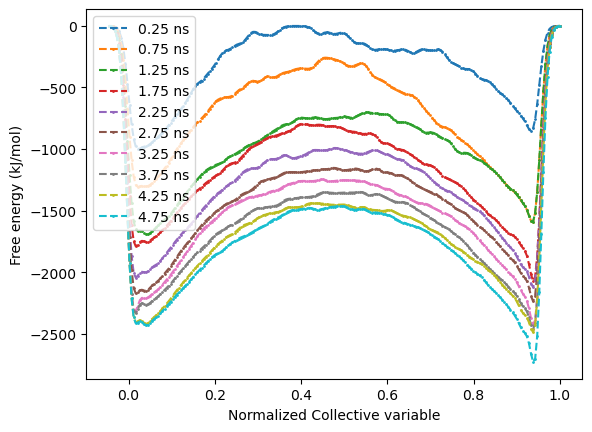

In [160]:
for i in range(0,20, 2):
    fes=np.genfromtxt("timeseries/fes_" + str(i) + ".dat")
    plt.plot(fes[:,0]/np.max(fes[:,0]),fes[:,1],label=str((i+1)*0.25) + " ns", linestyle='dashed', marker='o', markersize=1)
plt.xlabel("Normalized Collective variable")
plt.ylabel("Free energy (kJ/mol)")
plt.legend()
plt.savefig( "timeseries_1670K.png", dpi=300)

-97278.35093722324
8175.063276704357
135513.14707002824
141369.61633249102
146568.48295334072
The melting point is: 1659.44 K
rval
-0.7932037829574702


/var/folders/87/z37n4g2j595fd7ly45xb9y680000gn/T/ipykernel_2942/2884430829.py:30: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  intsolid = np.trapz(y_solid, x[int(N/2):])
/var/folders/87/z37n4g2j595fd7ly45xb9y680000gn/T/ipykernel_2942/2884430829.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  intliquid = np.trapz(y_liquid, x[:int(N/2)])
/var/folders/87/z37n4g2j595fd7ly45xb9y680000gn/T/ipykernel_2942/2884430829.py:33: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  int_single.append(np.trapz(y, x))
/var/folders/87/z37n4g2j595fd7ly45xb9y680000gn/T/ipykernel_2942/2884430829.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when leg

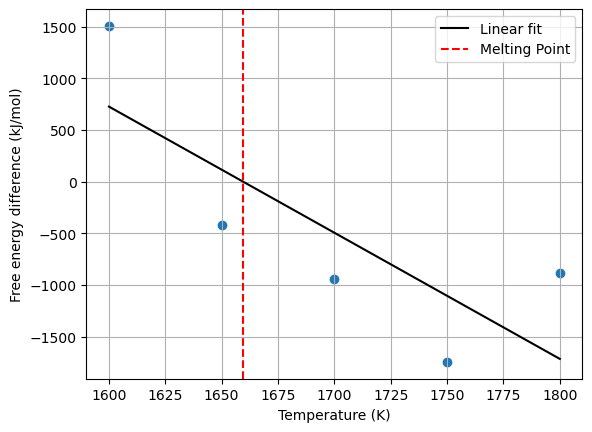

In [253]:
deltaf = []
ints = []
int_single = []


min_solid = []  
min_liquid = []


temps = [1600, 1650, 1700, 1750, 1800]
# temps = [1650]
for T in temps:
    fes=np.genfromtxt("different_sigma/"+str(T)+".dat")
    N = fes.shape[0]
    x = fes[:,0]
    y = np.array(fes[:,1])
    # plt.plot(x, np.exp(-y/(T*8.3145)), label=str(T) + " K")
    # plt.plot(x,y, label=str(T) + " K", linestyle='dashed', marker='o', markersize=1)
    y_solid = np.array(fes[:,1][int(N/2):])
    y_liquid = np.array(fes[:,1][:int(N/2)])
    freeEnergyLiquid=np.amin(y_liquid)

    min_liquid.append(np.amin(y_liquid))
    min_solid.append(np.amin(y_solid))

    freeEnergySolid=np.amin(y_solid)
    deltaFreeEnergy=freeEnergySolid-freeEnergyLiquid
    deltaf.append(deltaFreeEnergy)

    intsolid = np.trapz(y_solid, x[int(N/2):])
    intliquid = np.trapz(y_liquid, x[:int(N/2)])

    int_single.append(np.trapz(y, x))

    print(intliquid-intsolid)
    ints.append(intliquid-intsolid)


plt.legend()

plt.scatter(temps, deltaf)
slope, intercept, r_value, p_value, std_err = linregress(temps, deltaf)
tempcont = np.linspace(1600, 1800, 100)
plt.plot(tempcont, slope*tempcont + intercept, label="Linear fit", color='k')
plt.axvline(-intercept/slope, color='r', linestyle='--', label="Melting Point")
plt.xlabel("Temperature (K)")
plt.ylabel("Free energy difference (kJ/mol)")
plt.grid()
plt.legend()


print("The melting point is: " + "{:.{}f}".format(-intercept/slope,2) + " K")   

print('rval')
print(r_value)


Heat (solid) (eV/particle):
-0.01501231206988596
Heat (liquid) (eV/particle):
nan
Heat (latent) (eV/particle):
nan


/Users/moritzobenauer/miniforge3/envs/MLO/lib/python3.10/site-packages/scipy/stats/_stats_py.py:10729: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/moritzobenauer/miniforge3/envs/MLO/lib/python3.10/site-packages/scipy/stats/_stats_py.py:10743: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/moritzobenauer/miniforge3/envs/MLO/lib/python3.10/site-packages/scipy/stats/_stats_py.py:10749: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


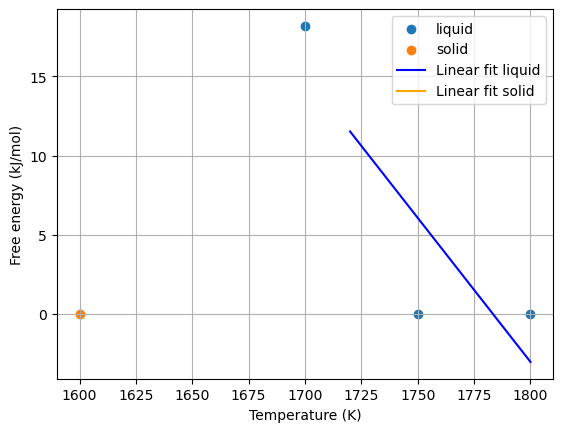

In [241]:
plt.scatter(temps[-3:], min_solid[-3:], label="liquid")
plt.scatter(temps[:-4], min_liquid[:-4], label="solid")


slope, intercept, r_value, p_value, std_err = linregress(temps[-3:], min_solid[-3:])
tempcont = np.linspace(1720, 1800, 100)
plt.plot(tempcont, slope*tempcont + intercept, label="Linear fit liquid", color='blue')

entropy_solid = slope

print('Heat (solid) (eV/particle):')
T=1720
NA = 6.022e+23
NPARTICLES = 216
print(slope*1000*T*6.242e+18/NA/NPARTICLES)


slope, intercept, r_value, p_value, std_err = linregress(temps[:-4], min_liquid[:-4])
tempcont = np.linspace(1600, 1720, 100)

plt.plot(tempcont, slope*tempcont + intercept, label="Linear fit solid", color='orange')

entropy_liquid = slope


print('Heat (liquid) (eV/particle):')
T=1720
NA = 6.022e+23
NPARTICLES = 216
print(slope*1000*T*6.242e+18/NA/NPARTICLES)



print('Heat (latent) (eV/particle):')
T=1725
NA = 6.022e+23
NPARTICLES = 216
print((entropy_solid-entropy_liquid)*1000*T*6.242e+18/NA/NPARTICLES)



plt.xlabel("Temperature (K)")
plt.ylabel("Free energy (kJ/mol)")
plt.legend()
plt.grid()

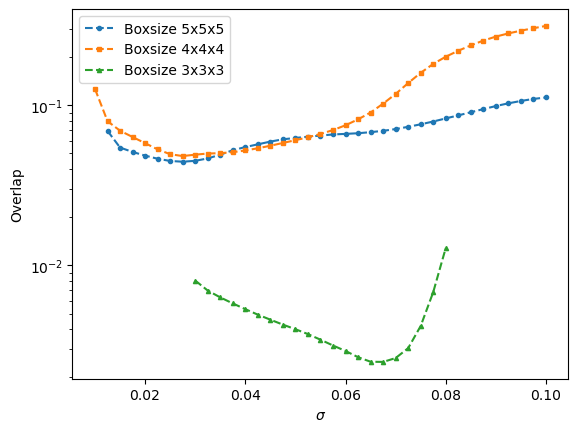

In [260]:
data=np.genfromtxt("overlap_b5.txt")
# plt.scatter(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,1], label='Boxsize 5x5x5', linestyle='dashed', marker='o', markersize=3)

data=np.genfromtxt("overlap_b4.txt")
# plt.scatter(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,1], label='Boxsize 4x4x4', linestyle='dashed', marker='s', markersize=3)

data=np.genfromtxt("overlap_b3.txt")
# plt.scatter(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,1], label='Boxsize 3x3x3', linestyle='dashed', marker='^', markersize=3)

plt.xlabel(r"$\sigma$")
plt.ylabel("Overlap")
plt.yscale('log')
plt.legend()
plt.savefig("overlap.png", dpi=300)